In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [ ]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('cluster_0.xlsx', sheet_name='Sheet1')
print(df.tail(10))

       peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeça  altura
464  130.10               19.3                16.6                 5.0     5.5
465  251.30               23.5                19.3                 6.0     7.4
466  209.89               21.5                18.3                 5.7     6.6
467  220.04               22.0                18.8                 5.5     6.5
468  242.40               24.9                21.3                 7.0     7.9
469  249.00               25.9                21.3                 7.3     8.1
470  232.74               22.8                19.4                 6.3     7.0
471  164.67               20.7                17.6                 5.5     5.6
472  224.58               22.0                19.6                 6.3     6.5
473  233.34               22.9                19.4                 6.8     6.5


In [ ]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [ ]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df,  target = 'peso', train_size=0.8)
best_model = exp2.compare_models()

,Description,Value
0,Session id,1357
1,Target,peso
2,Target type,Regression
3,Original data shape,"(474, 5)"
4,Transformed data shape,"(474, 5)"
5,Transformed train set shape,"(379, 5)"
6,Transformed test set shape,"(95, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,5.5968,60.0477,7.5639,0.9867,0.0592,0.0489,0.0710
lightgbm,Light Gradient Boosting Machine,5.6925,61.3921,7.6882,0.9864,0.0610,0.0507,0.1360
gbr,Gradient Boosting Regressor,5.7330,63.6867,7.8859,0.9859,0.0605,0.0496,0.0420
ada,AdaBoost Regressor,6.2682,66.6594,8.1075,0.9852,0.0848,0.0682,0.0350
et,Extra Trees Regressor,5.7452,67.9049,8.0517,0.9849,0.0617,0.0497,0.0560
xgboost,Extreme Gradient Boosting,6.6483,87.5710,9.1121,0.9806,0.0707,0.0581,0.1090
dt,Decision Tree Regressor,6.8086,91.4783,9.4024,0.9796,0.0738,0.0599,0.0190
knn,K Neighbors Regressor,5.9457,123.3641,10.0057,0.9706,0.0857,0.0537,0.0160
lasso,Lasso Regression,10.1613,169.7754,12.9317,0.9621,0.2060,0.1176,0.0160
llar,Lasso Least Angle Regression,10.1698,170.8879,12.9667,0.9618,0.2062,0.1177,0.0110


In [ ]:
rf = exp2.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9595,39.1344,6.2557,0.9873,0.0573,0.0425
1,6.8334,87.3199,9.3445,0.9816,0.0694,0.0547
2,4.4232,34.1470,5.8435,0.9926,0.0550,0.0450
3,5.2404,43.1641,6.5699,0.9907,0.0545,0.0456
4,6.2196,69.5874,8.3419,0.9844,0.0559,0.0486
5,4.0662,37.1766,6.0973,0.9896,0.0567,0.0466
6,7.5207,94.8598,9.7396,0.9757,0.0666,0.0558
7,3.6491,21.6706,4.6552,0.9957,0.0549,0.0430
8,5.4159,67.0310,8.1872,0.9868,0.0577,0.0455


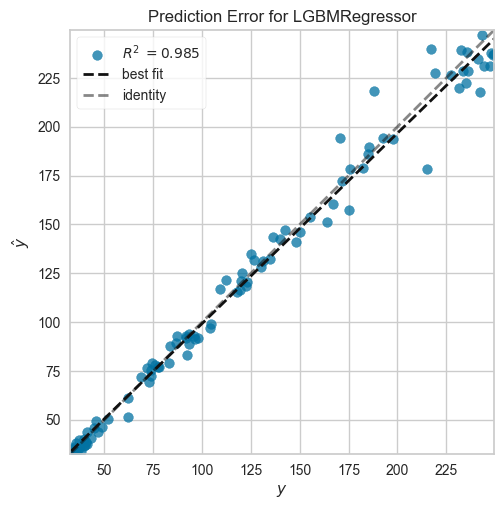

In [ ]:
exp2.plot_model(rf, plot = 'error')

In [ ]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,5.7158,74.5249,8.6328,0.9847,0.0589,0.0468


,Index,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,espessura,cluster,peso,prediction_label
315,NaN,18.600000,15.800000,4.9,5.5,2.3,0,134.750000,132.355392
83,NaN,13.400000,11.500000,3.4,4.0,1.7,0,48.560001,46.397178
368,NaN,19.200001,16.799999,5.4,6.9,2.4,0,175.779999,178.140805
314,NaN,17.700001,15.000000,4.8,5.3,2.4,0,119.209999,116.473864
382,NaN,19.600000,16.900000,5.3,6.3,2.5,0,171.639999,172.229637
140,NaN,15.500000,13.300000,4.1,4.7,1.9,0,77.550003,76.842329
155,NaN,16.000000,13.500000,4.2,4.7,2.0,0,74.300003,78.841788
332,NaN,16.799999,14.300000,4.6,4.7,2.2,0,96.379997,91.127537
4,NaN,13.200000,11.300000,3.8,4.5,1.6,0,45.480000,49.088171
381,NaN,20.200001,17.200001,5.4,6.5,2.8,0,197.509995,193.632235


In [ ]:
peso_pred_semEspe.head()

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
451,21.500000,17.900000,5.8,7.1,255.080002,233.648845
577,24.299999,20.299999,6.2,8.0,352.519989,333.177453
483,24.200001,20.600000,5.8,7.5,296.239990,318.717987
314,17.700001,15.000000,4.8,5.3,119.209999,116.416024
380,20.600000,17.799999,5.9,7.0,188.199997,225.403592


# Slavando do Modelo

In [ ]:
### Saving model 
save_model(rf, 'gbr_df1') 


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['comprimento_Total',
                                              'comprimento_Padrao',
                                              'comprimento_Cabeça', 'altura'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  GradientBoostingRegressor(random_state=3390))]),
 'gbr_df1.pkl')

In [ ]:
################### LOADING MODEL
saved_rf = load_model('gbr_df1') 

saved_rf 

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\crist\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['comprimento_Total',
                                             'comprimento_Padrao',
                                             'comprimento_Cabeça', 'altura'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 GradientBoostingRegressor(random_state=3390))])

In [ ]:
exp2.predict_model(saved_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,10.7730,431.8418,20.7808,0.9698,0.0827,0.0613


,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
451,21.500000,17.900000,5.8,7.1,255.080002,233.648845
577,24.299999,20.299999,6.2,8.0,352.519989,333.177453
483,24.200001,20.600000,5.8,7.5,296.239990,318.717987
314,17.700001,15.000000,4.8,5.3,119.209999,116.416024
380,20.600000,17.799999,5.9,7.0,188.199997,225.403592
...,...,...,...,...,...,...
210,14.800000,12.800000,3.4,4.5,69.970001,68.581856
515,25.400000,21.299999,6.2,8.3,408.440002,396.402615
65,13.200000,11.100000,3.3,4.0,40.840000,42.661610
236,15.000000,12.700000,4.0,4.6,68.709999,69.134634


In [ ]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)